In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import math

In [6]:
A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]])
b = np.array([12, 2, 1])

In [7]:
np.linalg.solve(A, b)

array([-9.2       ,  0.9       ,  6.46666667])

In [3]:
A = np.array([[1, 2, -1], [3, -4, 0], [8, -5, 2], [2, 0, -5], [11, 4, -7]])
b = np.array([1, 7, 12, 7, 15])

In [5]:
np.linalg.lstsq(A, b)

/Users/anastasia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(array([ 1.13919353, -0.90498444, -0.9009803 ]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

### Решение системы

In [68]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = np.array([[12, 2, 1]])

In [65]:
np.linalg.det(A)

-9.51619735392994e-16

In [72]:
C = np.concatenate((A, b.T), axis=1)
print(C)

[[ 1  2  3 12]
 [ 4  5  6  2]
 [ 7  8  9  1]]


In [73]:
print(np.linalg.matrix_rank(A))
print(np.linalg.matrix_rank(C))

2
3


##### определитель равен 0, ранг исходной матрицы меньше ранга расширенной матрицы: система не имеет решений

для того, чтобы система была совместной, можно решить систему 2 из 3 уравнений и использовать полученные соотношения для нахождения нового вектора b

а можно воспользовать тем, что при b = (0, 0, 0) такая система совместна имеет как минимум одно решение и является совместной

In [75]:
b = np.array([0, 0, 0])

In [76]:
np.linalg.solve(A, b)

array([ 0.,  0., -0.])

как и ожидалось, теперь система совместна, но имеет единственное нулевое решение

### Разложение

In [8]:
from scipy import linalg

In [9]:
A = np.array([[1, 2, 3], [2, 16, 21], [4, 28, 73]])

In [10]:
P, L, U = linalg.lu(A)

In [17]:
print('det A = ', linalg.det(A))
print()

print(P)
print(L)
print(U)

det A =  432.0

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]


##### зададим вектор B и решим полученную систему линейных уравнений

In [18]:
B = np.array([3, 5, 7])

In [21]:
result = np.linalg.solve(A, B)
print(f'(x, y, z) = {result}')

(x, y, z) = [ 3.21296296  0.03240741 -0.09259259]


### псевдорешение

In [47]:
A = np.array([[1, 2, -1], [8, -5, 2]])
b = np.array([1, 12])

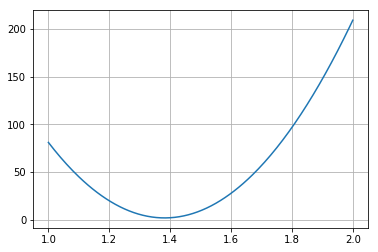

In [44]:
def Q(x, y, z):
    return(x**2 + y**2 + z**2)
x = np.linspace(1, 2, 201)
plt.plot(x, Q(x, (10 * x - 14), (21 * x - 29)))
plt.grid(True)
plt.show()

In [45]:
x = 1.38
y = 10 * x - 14
z = 21 * x - 29

print(f'( {x}, {y}, {z} )')

( 1.38, -0.20000000000000107, -0.020000000000003126 )


In [48]:
np.linalg.lstsq(A, b)

/Users/anastasia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

#### вырожденная система

In [51]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = np.array([2, 5, 11])

In [53]:
Q, R = np.linalg.qr(A)
print(A)
print(Q)
print(R)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.11164740e-15]]


In [55]:
R1 = R[:2, :2]
R1

array([[-8.1240384 , -9.6011363 ],
       [ 0.        ,  0.90453403]])

In [56]:
B1 = np.dot(np.transpose(Q), B)[:2]
B1

array([-8.86258735,  2.11057941])

In [58]:
X1 = np.linalg.solve(R1, B1)
X1

array([-1.66666667,  2.33333333])

In [62]:
X = np.append(X1, 0)
print(f'решение - {X}')
print(np.linalg.norm(X))

решение - [-1.66666667  2.33333333  0.        ]
2.8674417556808667
